In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "../../Data/17000_world_campy_MLST_CC.csv"
rename = {"ST (MLST)": "ST", "clonal_complex (MLST)": "cc"}
df = pd.read_csv(path).set_index('id').rename(columns=rename)

df = df.loc[df['cc'].notna()].fillna('Unknown')
df['cc'] = df['cc'].apply(lambda x: x.split()[0])
df = df.astype(str)

In [3]:
mlst = pd.read_csv("../../Data/MLST_assighnment.tsv", sep='\t').set_index('ST')
mlst['cc_number'] = (
    mlst['clonal_complex']
    .fillna('ST-0 complex')
    .apply(lambda x: int(str(x).split(' ')[0].split('-')[1]))
)
mlst = mlst.loc[mlst['cc_number'] == mlst.index]
mlst = mlst.set_index('clonal_complex').drop(['cc_number'], axis=1).T
cols = [col.split(' ')[0] for col in mlst.columns]
mlst.columns = cols
mlst = mlst.astype(str)

<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_combined.drop('cc', axis=1)) == mlst[cc])
<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_combined.drop('cc', axis=1)) == mlst[cc])
<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_combined.drop('cc', axis=1)) == mlst[cc])
<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series com

<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_combined.drop('cc', axis=1)) == mlst[cc])
<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_combined.drop('cc', axis=1)) == mlst[cc])
<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_combined.drop('cc', axis=1)) == mlst[cc])
<ipython-input-5-7248a1b33144>:38: FutureWarning: Automatic reindexing on DataFrame vs Series com

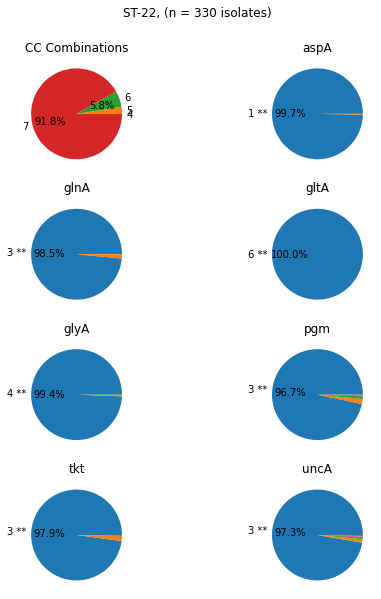

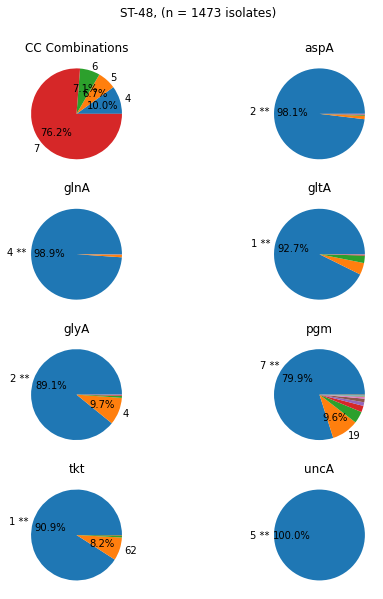

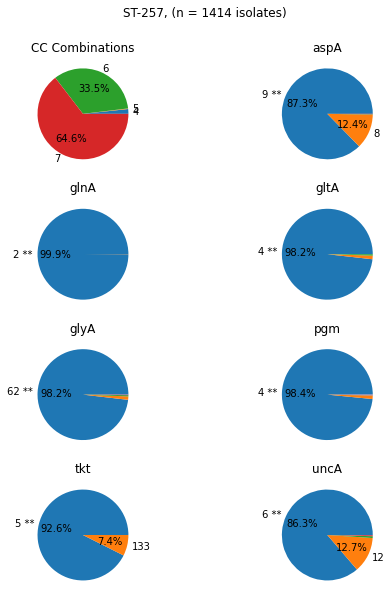

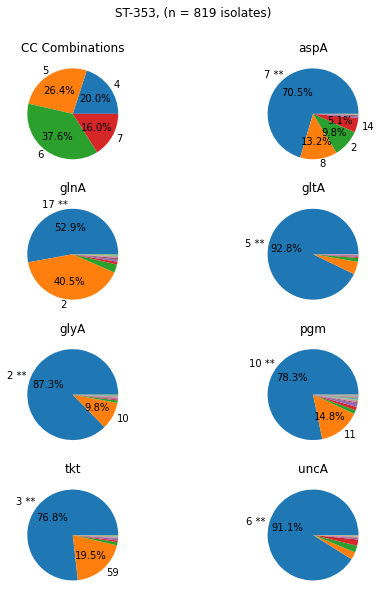

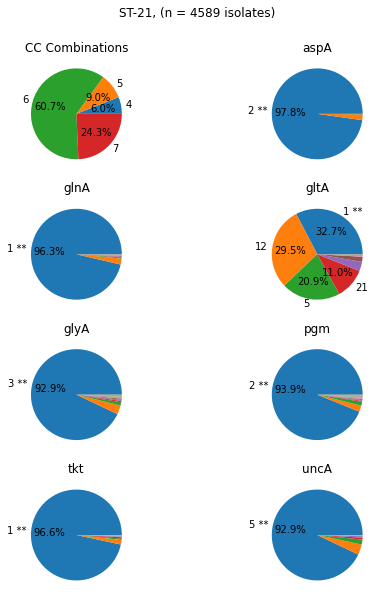

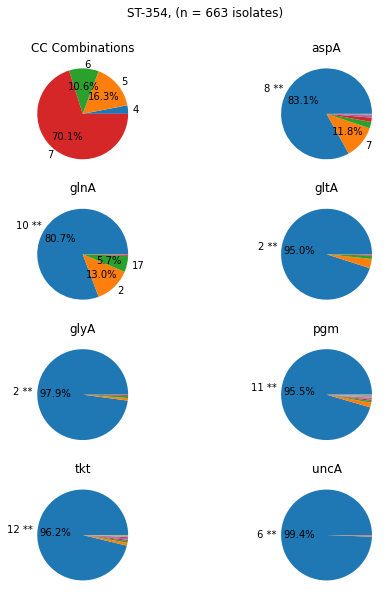

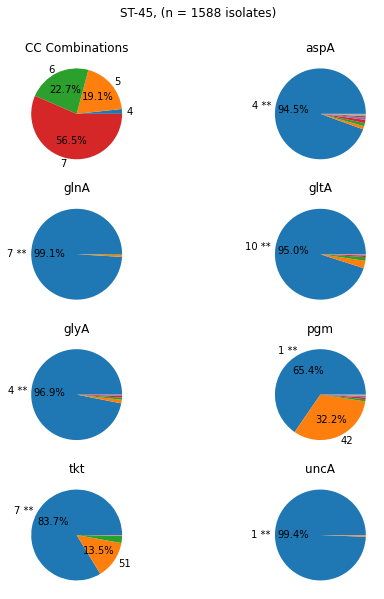

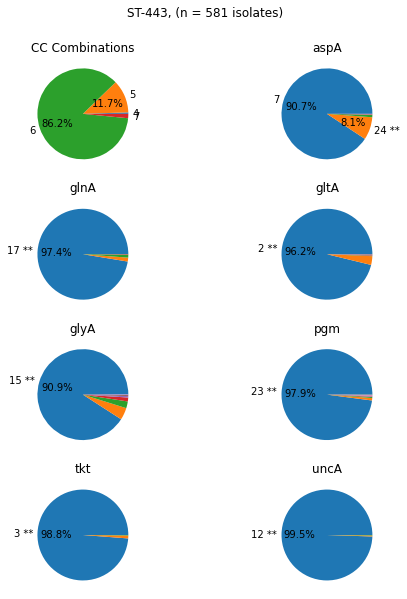

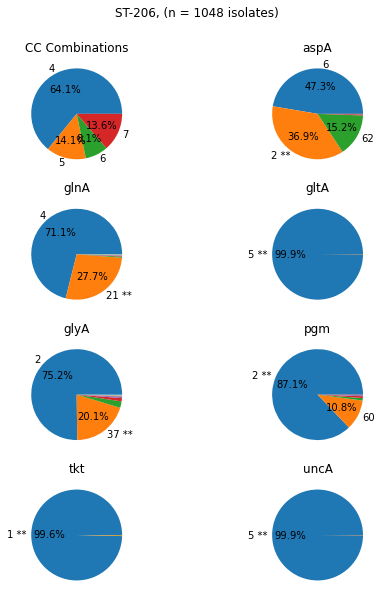

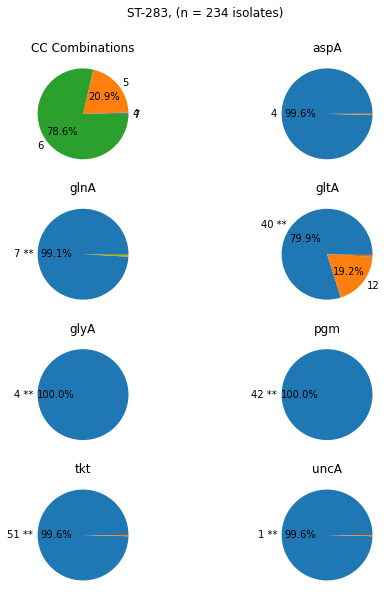

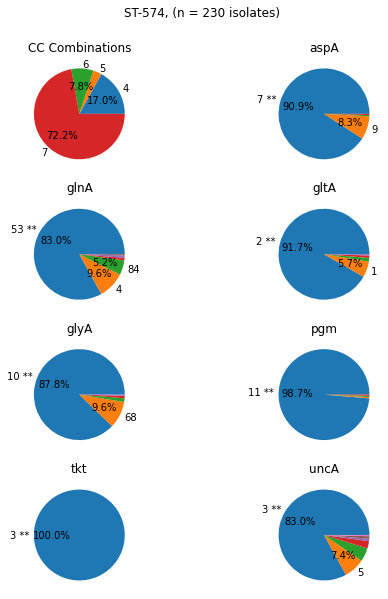

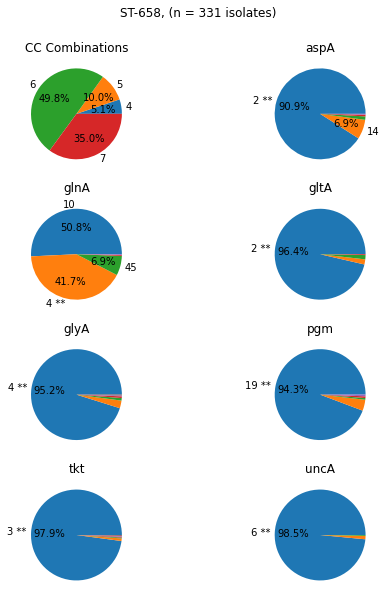

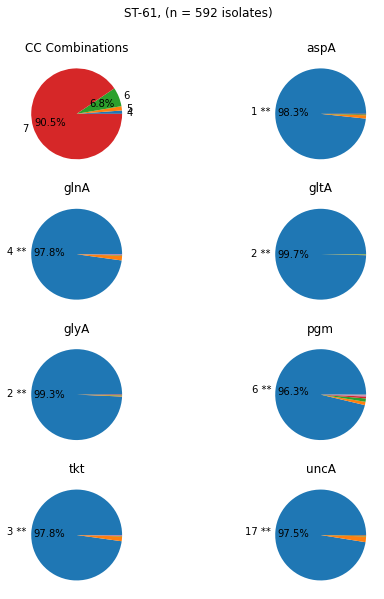

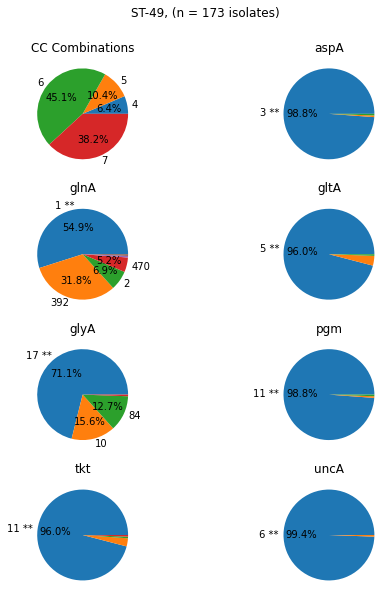

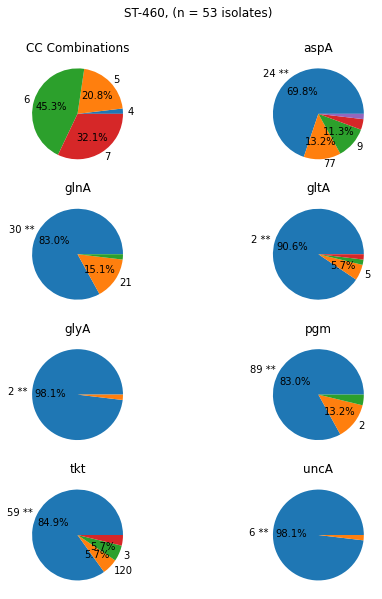

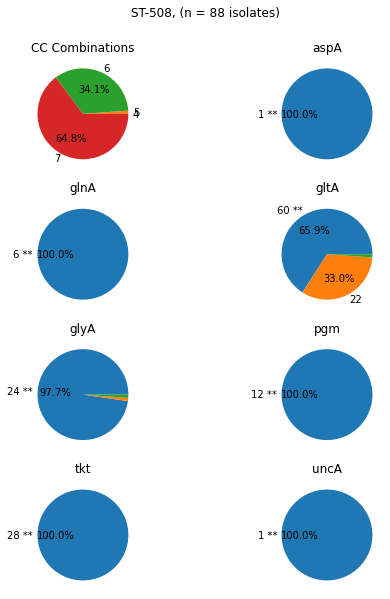

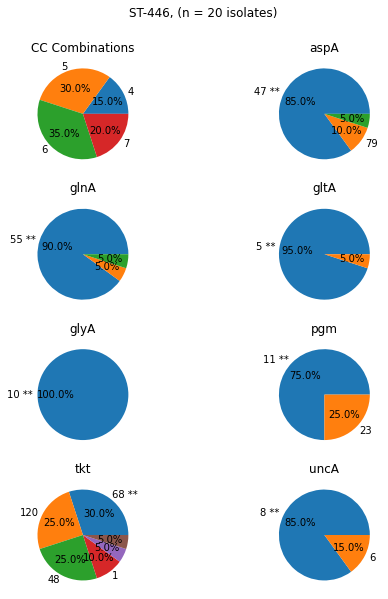

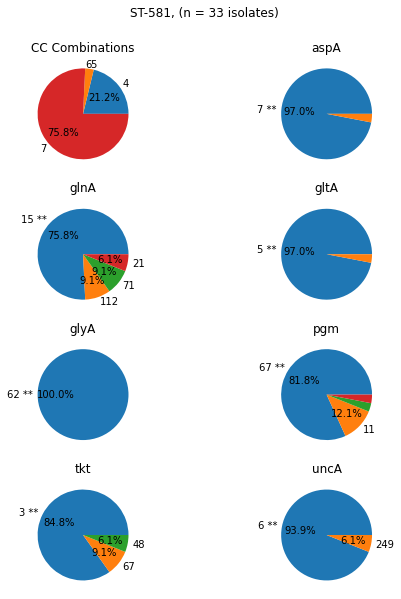

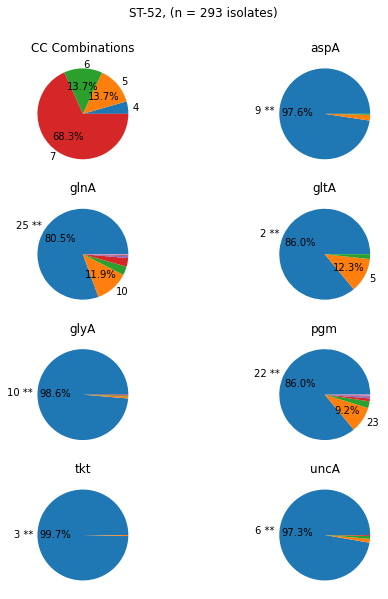

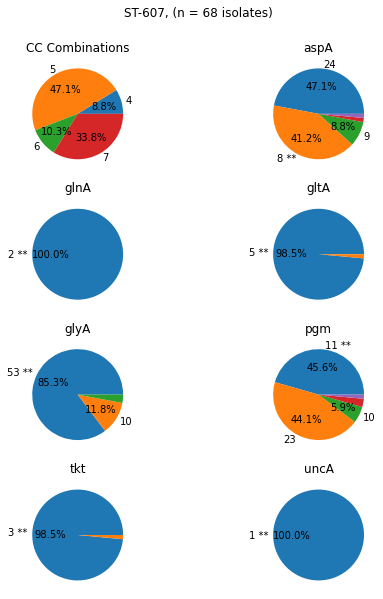

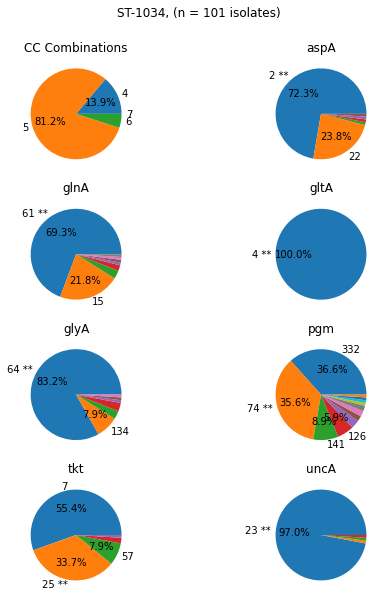

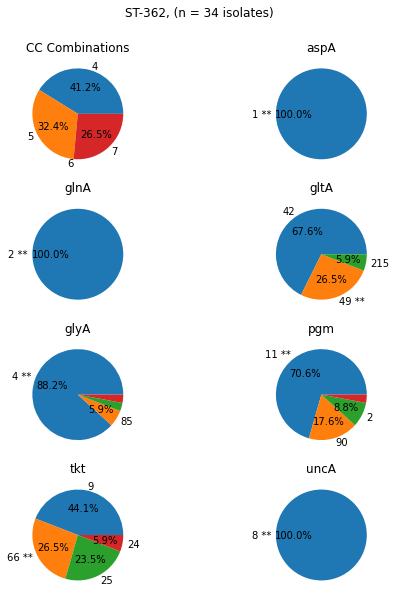

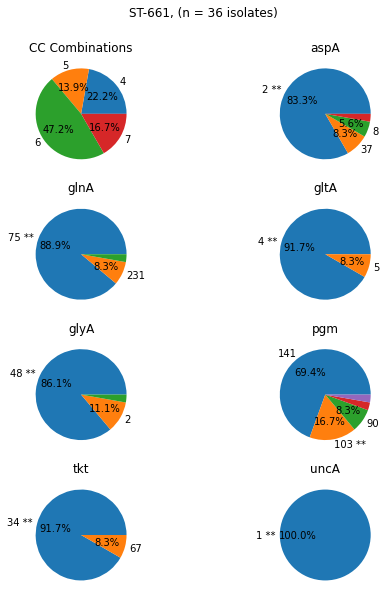

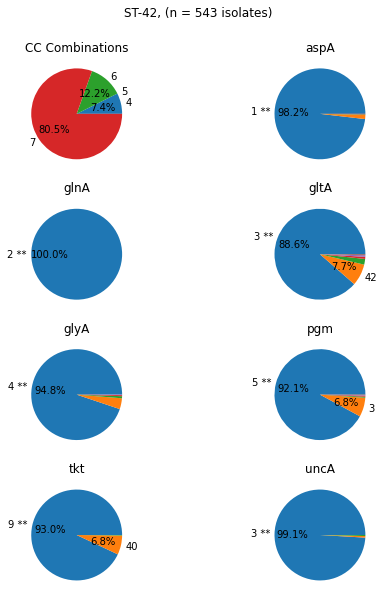

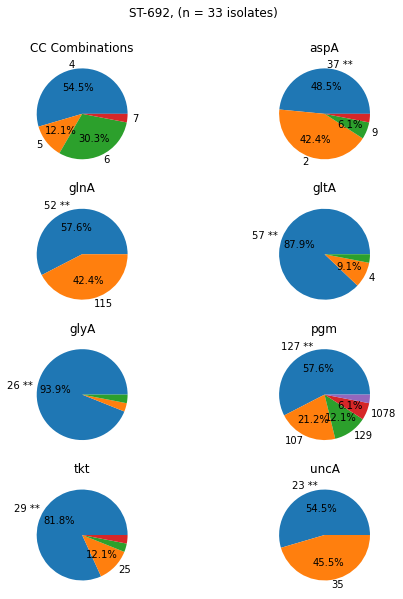

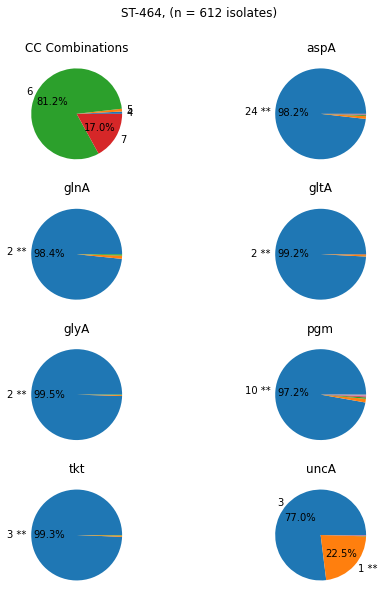

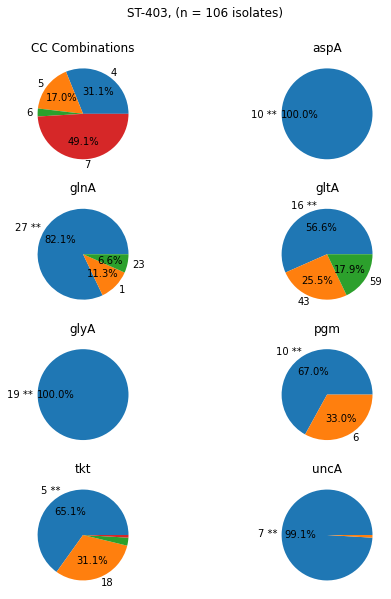

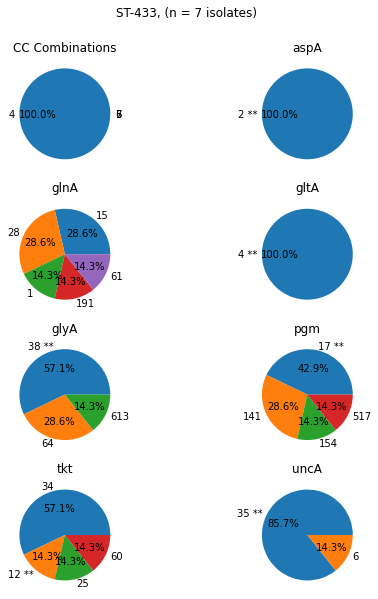

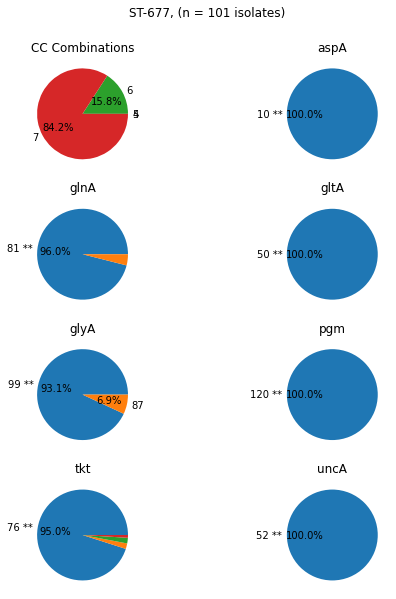

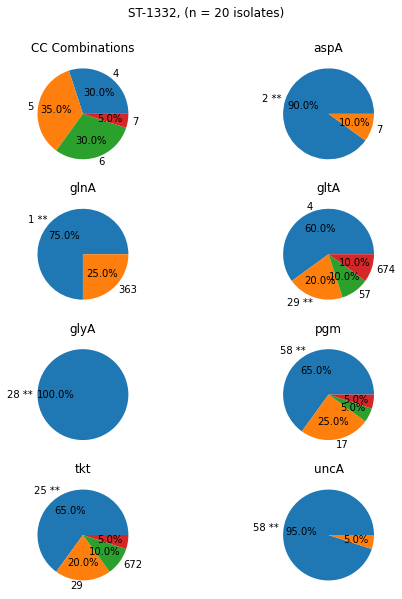

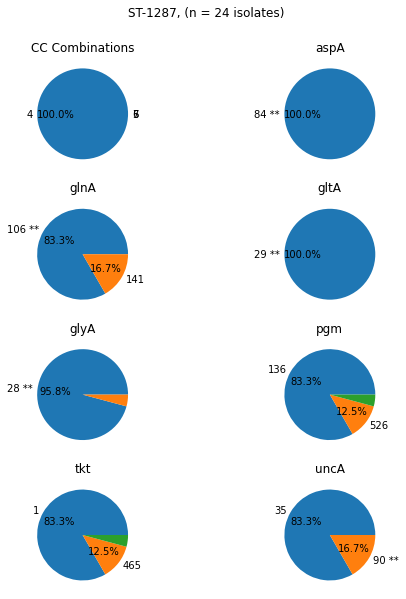

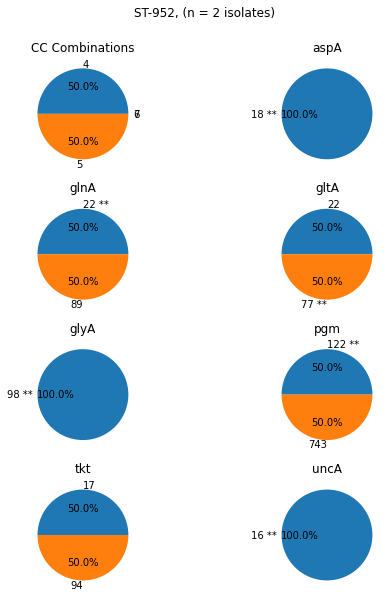

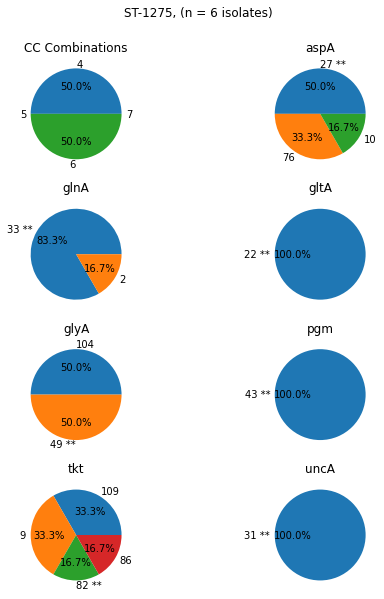

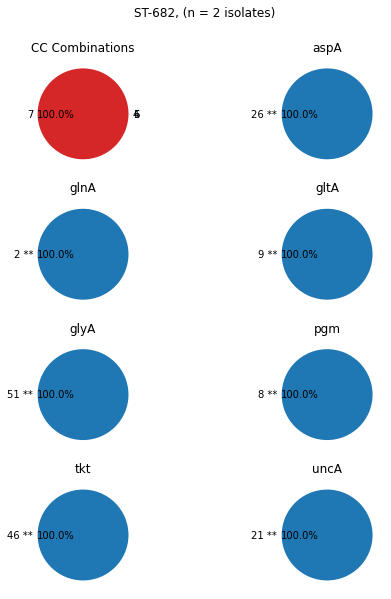

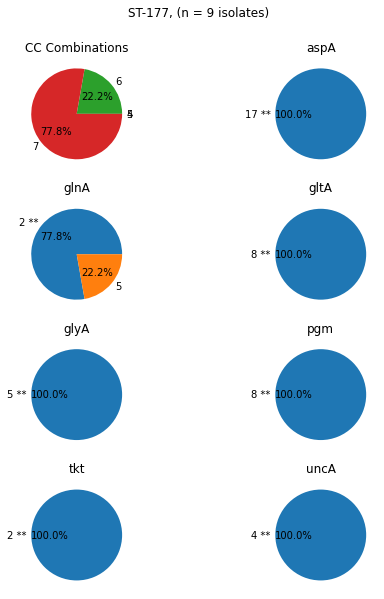

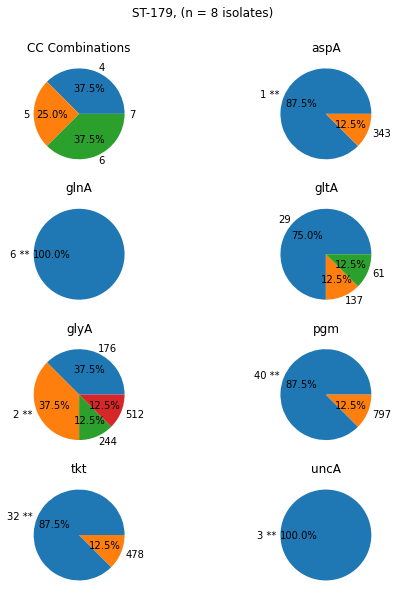

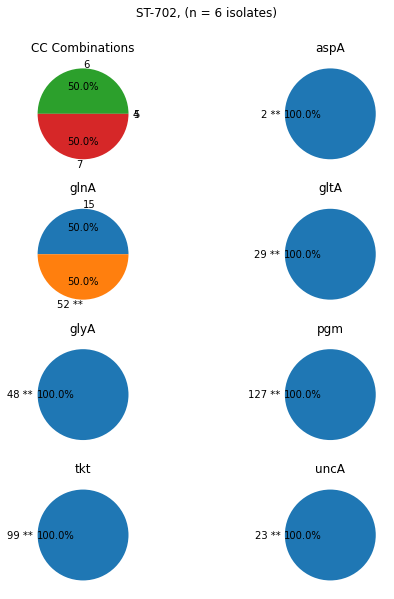

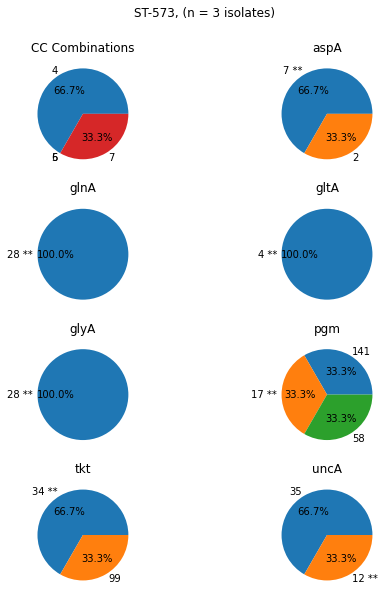

In [5]:
def custom_pct(pct):
    """ Exclude labels less than 5 percent """
    return ('%1.1f%%' % pct) if pct > 5 else ''

all_cc = []
for cc in df["cc"].unique():
    top_locus = {}
    df_combined = df[df["cc"] == cc] 

    fig, axes = plt.subplots(4, 2, figsize=(8,9))
    axes = axes.flatten()
    all_loci = ['aspA', 'glnA', 'gltA', 'glyA', 'pgm', 'tkt', 'uncA']

    for i, loci in enumerate(all_loci):
        i += 1
        counts = df_combined.groupby(loci).size().sort_values(ascending=False)
        
        ref = mlst.loc[mlst.index==loci, cc][0]
        labels = list(counts.index)
        labels = [f'{x} **' if x == ref else x for x in labels]
        
        # Set labels to blank if less than 5%
        pcts = (counts / counts.sum()) > 0.05
        new_labels = []
        for label, threshold in zip(labels, pcts):
            if threshold:
                new_labels.append(label)
            else:
                new_labels.append('')
        
        axes[i].pie(counts, labels=new_labels, autopct=custom_pct)
        axes[i].set_title(loci)
        
        most_freq = counts.sort_values().tail(1).index[0]
        top_locus[loci] = most_freq
        
    count_pie = (
        ((df_combined.drop('cc', axis=1)) == mlst[cc])
        .sum(axis=1)
        .value_counts()
        .reindex([4, 5, 6, 7])
        .fillna(0)
    )
    labels = count_pie.index
    axes[0].pie(count_pie, labels=labels, autopct=custom_pct)
    axes[0].set_title('CC Combinations')
    
    plt.suptitle(f'{cc}, (n = {counts.sum()} isolates)', y=0.95)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(f'../../Figures/piechart_17k/{cc}-locus-freq.png', dpi=300)

    all_cc.append(pd.Series(top_locus).rename(cc))
all_cc = pd.concat(all_cc, axis=1)

<Axes: >

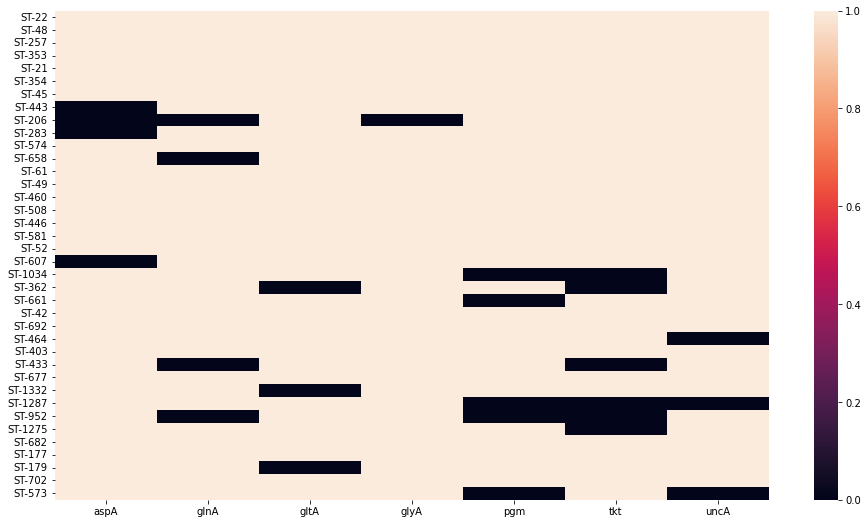

In [24]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap((mlst[all_cc.columns] == all_cc).T, yticklabels=1, ax=ax)

ST-22  ST-48  ST-257  ST-353  ST-21  ST-354  ST-45  ST-443  ST-206  \
aspA   True   True    True    True   True    True   True   False   False   
glnA   True   True    True    True   True    True   True    True   False   
gltA   True   True    True    True   True    True   True    True    True   
glyA   True   True    True    True   True    True   True    True   False   
pgm    True   True    True    True   True    True   True    True    True   
tkt    True   True    True    True   True    True   True    True    True   
uncA   True   True    True    True   True    True   True    True    True   

      ST-283  ...  ST-677  ST-1332  ST-1287  ST-952  ST-1275  ST-682  ST-177  \
aspA   False  ...    True     True     True    True     True    True    True   
glnA    True  ...    True     True     True   False     True    True    True   
gltA    True  ...    True    False     True    True     True    True    True   
glyA    True  ...    True     True     True    True     True    True    True   
pgm     True  ...    True     True    False   False     True    True    True   
tkt     True  ...    True     True    False   False    False    True    True   
uncA    True  ...    True     True    False    True     True    True    True   

      ST-179  ST-702  ST-573  
aspA    True    True    True  
glnA    True    True    True  
gltA   False    True    True  
glyA    True    True    True  
pgm     True    True   False  
tkt     True    True    True  
uncA    True    True   False  

[7 rows x 38 columns]